## Análisis de los datos producidos en Madgraph, simulados usando Pythia8 y Delphes.

 Realizado por: Sergio Duque Mejía, c.c: 1036654435

In [162]:
# Librerias necesarias
from CoffeaDelphes import Converter
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
plt.style.use([hep.style.ROOT])

Proceso: 
* pp    ->  z'  ->  b ~b

Objetivos:
* pt,$\eta$,$\phi$ (j1,j2,j3,j4)
* pt,$\eta$,$\phi$ (b1,b2)
* MET
* M(b1,b2)
* N(b)
* $\Delta \phi$(b1,b2)
* $\Delta \eta$(b1,b2)
* $\Delta R$(b1,b2)

In [8]:
fname = "Zprime_bbbar_M50.root" # archivo .root de eventos generados con Delphes.
tree = Converter(fname) # Generar el objeto tree
events = {"Jet": ["PT", "Eta", "Phi", "Mass", "BTag"],
          "MissingET": ["MET", "Phi"],
          "Muon": ["PT", "Eta", "Phi", "Charge"],
          "Electron": ["PT", "Eta", "Phi", "Charge"]} # generar un diccionario con los eventos que se desean.
tree.generate(events) # ingresar en
data = tree.df

In [3]:
data.head() # Visualizar los datos obtenidos

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,missinget_met,missinget_phi,muon_pt0,muon_eta0,muon_phi0,muon_charge0,electron_pt0,electron_eta0,electron_phi0,electron_charge0
0,62.016109,46.997913,34.228870,30.865467,-0.607084,-3.023663,-2.919088,1.207050,0.009484,-2.999144,...,16.189470,-0.094437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36.520973,30.758999,29.836596,20.442619,0.409347,1.242087,0.613536,-0.510407,1.015780,2.322117,...,3.657078,1.564066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.906301,14.655532,6.070272,5.402434,3.086690,3.324408,3.239179,2.796623,0.245975,-2.627605,...,6.746422,3.017491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.523180,15.212760,9.867399,8.487084,-0.722504,-0.741535,0.054573,-0.742068,-1.187535,2.179609,...,14.231677,0.079118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.747971,15.106291,8.664992,8.586075,1.288282,0.154733,3.127723,2.437404,3.006339,-0.438111,...,18.454487,1.671880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.columns # Se observa las columnas generadas

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_eta0', 'muon_phi0', 'muon_charge0', 'electron_pt0',
       'electron_eta0', 'electron_phi0', 'electron_charge0'],
      dtype='object')

In [ ]:
# formulas para Delta phi, Abs Delta phi y DeltaR
def DeltaPhi(i,row, col1, col2):
    """
    correction on azimuthal angle difference dphi
    """
    dphi = (row[col1] - row[col2])[i]
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi(i,rowa, col1a, col2a = 'met_Phi'):
    return np.abs(DeltaPhi(i,rowa, col1a, col2a))

def DeltaR(Deta,Dphi):
    return np.sqrt( Deta**2 + Dphi**2 )

In [255]:
# funcion para graficar
def pt_jet(data,feature,max_range, bin):
    '''
    Realiza un grafico de cada objeto.
    '''
    fig = plt.figure(figsize=(8,6))
    box_style=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    text = "n_events: {}".format(data[feature].count())+"\n"+"mean: {}".format(round(data[feature].mean(),2))+"\n" \
            +"sigma: {}".format(round(data[feature].std(),2))
    h = plt.hist(data[feature],bins=bin)
    ax = plt.gca()
    p = ax.patches  
    heights = [patch.get_height() for patch in p]

    try:
        if feature[4:-1] == 'pt': 
            name = '$P_T$'
            num = str(int(feature[-1])+1)
        elif feature[4:-1] == 'eta': 
            name = '$\eta$'
            num = str(int(feature[-1])+1)
        elif feature[4:-1] == 'phi': 
            name = '$\phi$'
            num = str(int(feature[-1])+1)
        elif feature[4:-1] == 'pt_b': 
            name = '$P_T$(b{})'.format(feature[-1])
            num = feature[-2:]
        elif feature[4:-1] == 'phi_b': 
            name = '$\phi (b{})$'.format(feature[-1])
            num = feature[-2:]
        elif feature[4:-1] == 'eta_b':
            name = '$\eta (b{})$'.format(feature[-1])
            num = feature[-2:]
        elif feature[4:-1] == 'a_phi_':
            name = '$\Delta \phi$'
            num = feature[-1:]
        elif feature[4:-1] == 'a_eta_':
            name = '$\Delta \eta$'
            num = feature[-1:]
        elif feature[4:-1] == 'aR_':
            name = '$\Delta R$'
            num = feature[-1:]
        elif feature[4:-1] == 'mass_':
            name = 'Masa invariante'
            num = feature[-1:]
        plt.title("{} for jet {}".format(name,num))
    except:
        name = feature[-3:]
        plt.title("{} for data".format(str(name).upper()) )
    
    
    
    plt.xlabel("{} [GeV]".format(name))
    plt.ylabel("Eventos")
    plt.text(max_range/2,max(heights)/1.5, text,bbox=box_style)
    plt.xlim(0,max_range)
    plt.show()

## Graficas de los Pt(j1,j2,j3,j4)

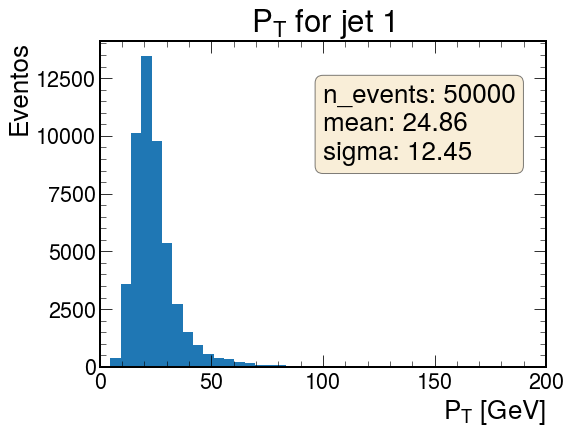

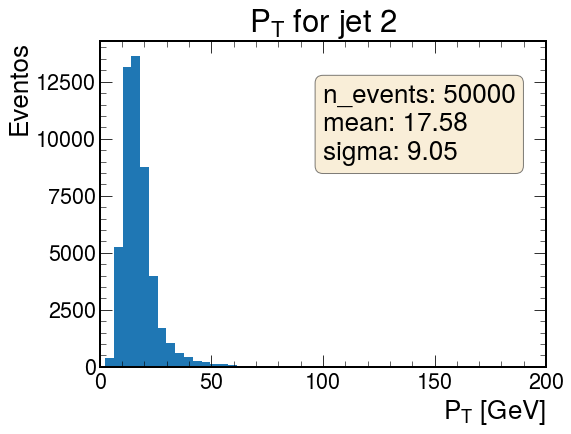

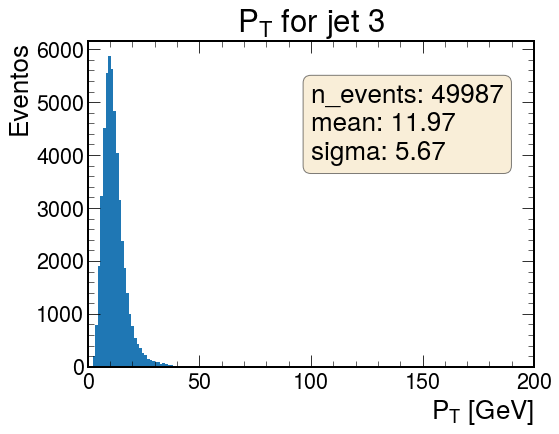

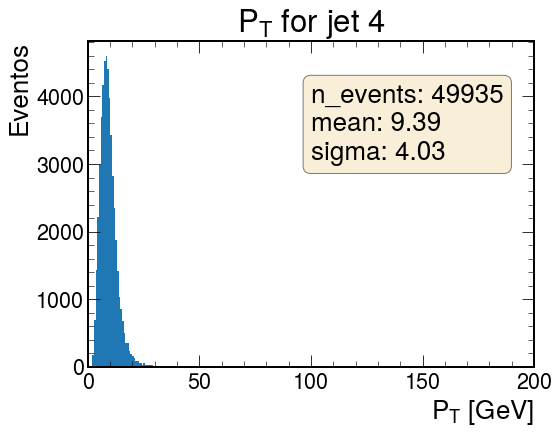

In [218]:
pt_jet(data,'jet_pt0',200,100)
pt_jet(data,'jet_pt1',200,100)
pt_jet(data,'jet_pt2',200,100)
pt_jet(data,'jet_pt3',200,100)

## Graficas de los $\eta$ (j1,j2,j3,j4)

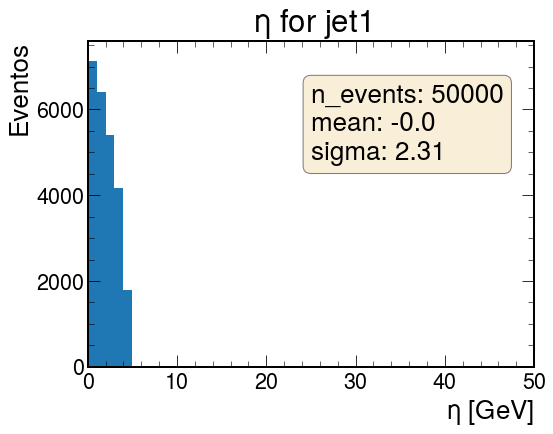

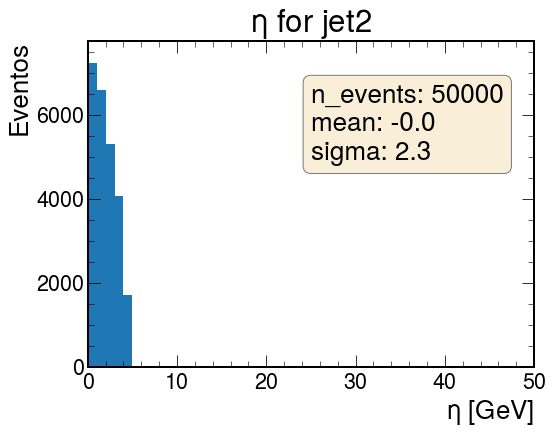

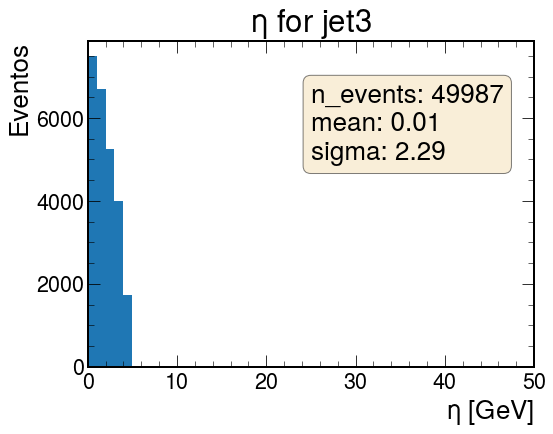

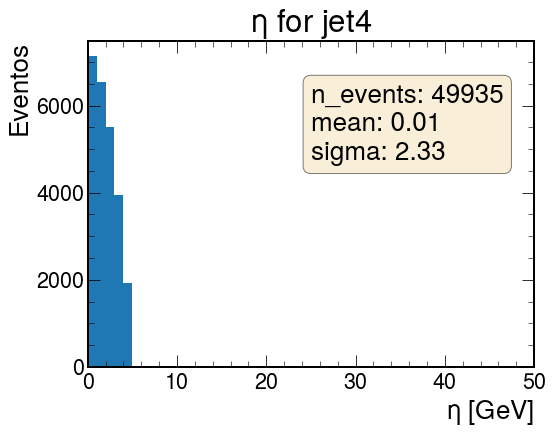

In [205]:
pt_jet(data,'jet_eta0',50,10)
pt_jet(data,'jet_eta1',50,10)
pt_jet(data,'jet_eta2',50,10)
pt_jet(data,'jet_eta3',50,10)

## Graficas de los $\phi$ (j1,j2,j3,j4)

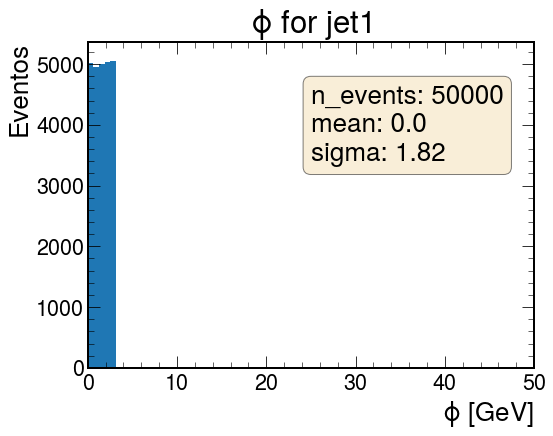

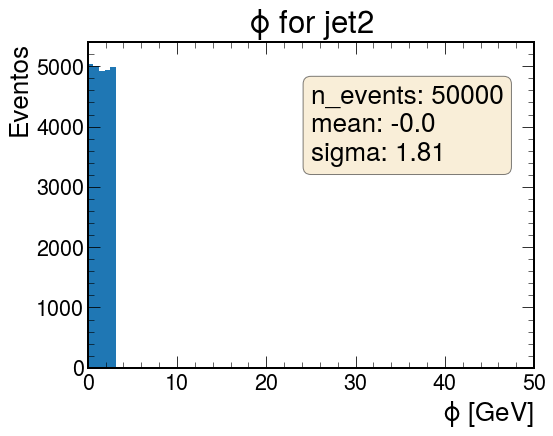

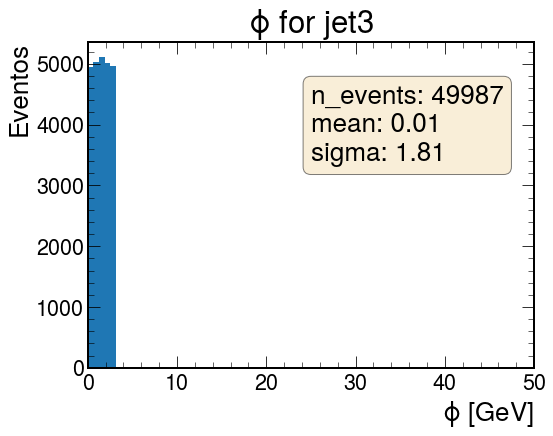

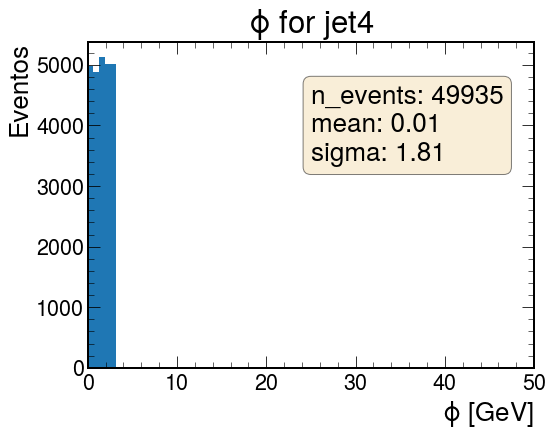

In [206]:
pt_jet(data,'jet_phi0',50,10)
pt_jet(data,'jet_phi1',50,10)
pt_jet(data,'jet_phi2',50,10)
pt_jet(data,'jet_phi3',50,10)

## MET

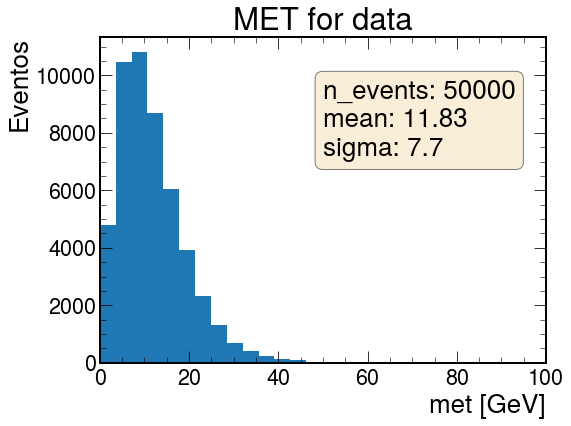

In [207]:
pt_jet(data,'missinget_met',100,50)

### Análisis para los bjets b1, b2

In [10]:
f = data[["jet_btag0","jet_btag1","jet_btag2","jet_btag3"]]
f_list = [ sum(f.loc[i]) for i in range(len(f)) ]
data.insert(1,"n_jets",f_list)

In [275]:
data_filtered = data[data["n_jets"] == 2]
print("Numero de eventos con 2 jets:",len(data_filtered))
data2 = data_filtered[["jet_btag0","jet_btag1","jet_btag2","jet_btag3","n_jets","jet_pt0","jet_pt1","jet_pt2","jet_pt3"]]
data2.head()

Numero de eventos con 2 jets: 7529


,jet_btag0,jet_btag1,jet_btag2,jet_btag3,n_jets,jet_pt0,jet_pt1,jet_pt2,jet_pt3
1,1.0,1.0,0.0,0.0,2.0,36.520973,30.758999,29.836596,20.442619
13,1.0,1.0,0.0,0.0,2.0,30.415281,14.244907,6.512156,5.555034
16,1.0,0.0,1.0,0.0,2.0,38.492733,34.573006,17.479437,16.904634
20,0.0,1.0,0.0,1.0,2.0,21.018349,19.937721,19.372181,15.938089
25,1.0,0.0,1.0,0.0,2.0,29.754230,18.750822,11.970448,10.842950


In [273]:
def count_bjets(data,list_feature):
    sum = 0
    for i in list_feature:
        d = data[i].value_counts()[1]
        print('Numero de bjets en {}: {}'.format(i[4:-1] + str( int(i[-1]) + 1 ),d))
        sum += d
    return sum
    
l = ['jet_btag0','jet_btag1','jet_btag2','jet_btag3']
print("Numero de bjets TOTAL: ", count_bjets(data2,l))

Numero de bjets en btag1: 6042
Numero de bjets en btag2: 5044
Numero de bjets en btag3: 2469
Numero de bjets en btag4: 1503
Numero de bjets TOTAL:  15058


Si en evento 1:
* btag0 -> 1.0 entonces pt_b1 -> jet_pt0
* btag1 -> 1.0 entonces pt_b2 -> jet_pt1

Si en evento 4:
* btag1 -> 1.0 entonces pt_b1 -> jet_pt1
* btag3 -> 1.0 entonces pt_b2 -> jet_pt3

In [239]:
tag_pt = []
tag_eta = []
tag_phi = []
for i in range(data2.shape[0]):
    pt = []
    eta = []
    phi = []
    if data2.iloc[i][0] == 1.0: 
        pt.append(data_filtered.jet_pt0.to_list()[i])
        eta.append(data_filtered.jet_eta0.to_list()[i])
        phi.append(data_filtered.jet_phi0.to_list()[i])
    if data2.iloc[i][1] == 1.0: 
        pt.append(data_filtered.jet_pt1.to_list()[i])
        eta.append(data_filtered.jet_eta1.to_list()[i])
        phi.append(data_filtered.jet_phi1.to_list()[i])
    if data2.iloc[i][2] == 1.0: 
        pt.append(data_filtered.jet_pt2.to_list()[i])
        eta.append(data_filtered.jet_eta2.to_list()[i])
        phi.append(data_filtered.jet_phi2.to_list()[i])
    if data2.iloc[i][3] == 1.0: 
        pt.append(data_filtered.jet_pt3.to_list()[i])
        eta.append(data_filtered.jet_eta3.to_list()[i])
        phi.append(data_filtered.jet_phi3.to_list()[i])
    tag_pt.append(pt)
    tag_eta.append(eta)
    tag_phi.append(phi)


jet_pt_b1 = [j[0] for j in tag_pt]
jet_pt_b2 = [j[1] for j in tag_pt]
jet_eta_b1 = [j[0] for j in tag_eta]
jet_eta_b2 = [j[1] for j in tag_eta]
jet_phi_b1 = [j[0] for j in tag_phi]
jet_phi_b2 = [j[1] for j in tag_phi]


di = {"jet_pt_b1":jet_pt_b1,"jet_pt_b2":jet_pt_b2,
      "jet_eta_b1":jet_eta_b1,"jet_eta_b2":jet_eta_b2,
      "jet_phi_b1":jet_phi_b1,"jet_phi_b2":jet_phi_b2}

data_bjet = pd.DataFrame(di)
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930


In [277]:
print("Numero de eventos taggeados como b:",len(data_bjet))

Numero de eventos taggeados como b: 7529


In [240]:
phi_cor = []
for i in range(len(data_bjet)):
    phi_cor.append(AbsDeltaPhi(i,data_bjet,"jet_phi_b1","jet_phi_b2"))

data_bjet['Delta_eta_b'] = data_bjet.jet_eta_b2 - data_bjet.jet_eta_b1
data_bjet['Delta_phi_b'] = phi_cor
data_bjet["DeltaR_b"] = DeltaR(data_bjet.Delta_eta_b,data_bjet.Delta_phi_b)

### Dataset para los b1,b2
Contiene:
* $P_T$(b1), $P_T$(b2)
* $\eta$(b1), $\eta$(b2)
* $\phi$(b1), $\phi$(b2)
* $\Delta \eta$(b1,b2)
* $\Delta \phi$(b1,b2)
* $\Delta R$(b1,b2)

In [241]:
data_bjet

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,Delta_eta_b,Delta_phi_b,DeltaR_b
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,0.832740,1.306336,1.549184
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,-0.630164,2.695330,2.768016
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,0.444513,1.249388,1.326108
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,0.992696,1.734860,1.998796
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,-1.321776,3.137044,3.404136
...,...,...,...,...,...,...,...,...,...
7524,26.941105,15.772039,-1.739753,-1.530987,-3.132066,0.061618,0.208766,3.089501,3.096547
7525,20.269426,7.448634,0.991686,1.267181,-0.292690,0.131196,0.275495,0.423886,0.505546
7526,21.767372,13.848560,-2.356918,-2.206438,-1.063697,2.005122,0.150480,3.068819,3.072506
7527,24.970339,20.641563,0.534250,0.022653,0.262862,-2.725161,-0.511597,2.988023,3.031503


## Graficas de los $P_T$(b1,b2)

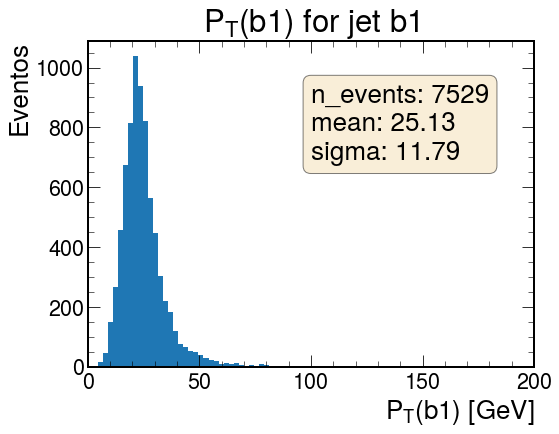

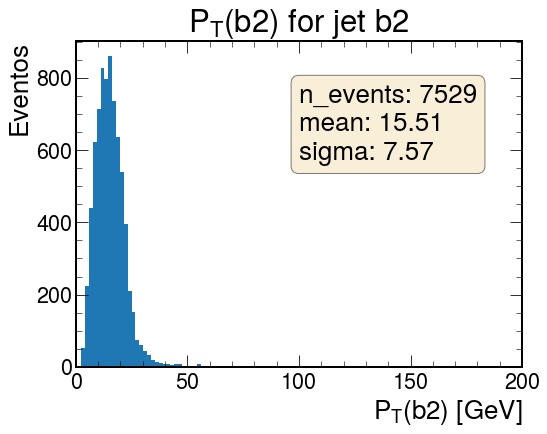

In [242]:
pt_jet(data_bjet,'jet_pt_b1',200,100)
pt_jet(data_bjet,'jet_pt_b2',200,100)

## Graficas de los $\eta$(b1), $\eta$(b2)

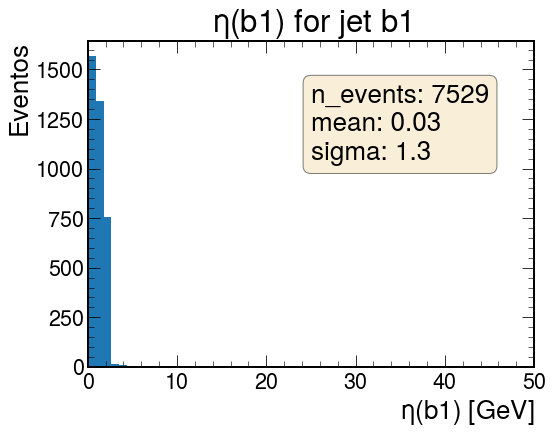

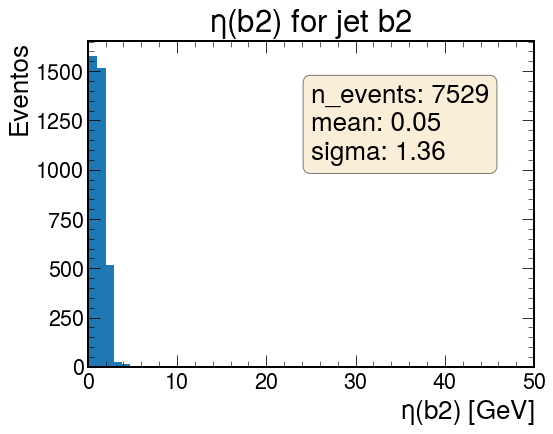

In [243]:
pt_jet(data_bjet,'jet_eta_b1',50,10)
pt_jet(data_bjet,'jet_eta_b2',50,10)

## Graficas de los $\phi$(b1), $\phi$(b2)

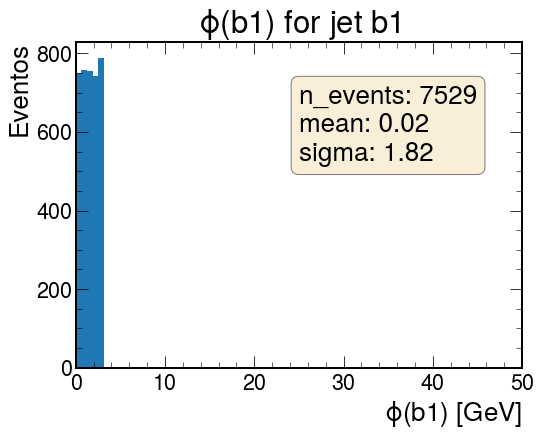

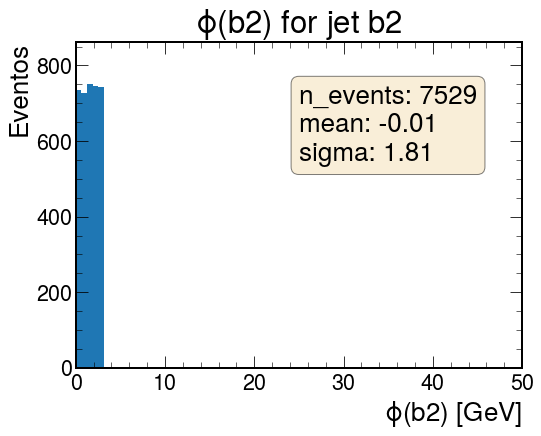

In [244]:
pt_jet(data_bjet,'jet_phi_b1',50,10)
pt_jet(data_bjet,'jet_phi_b2',50,10)

## Graficas de los $\Delta \phi$, $\Delta \eta$ y $\Delta R$

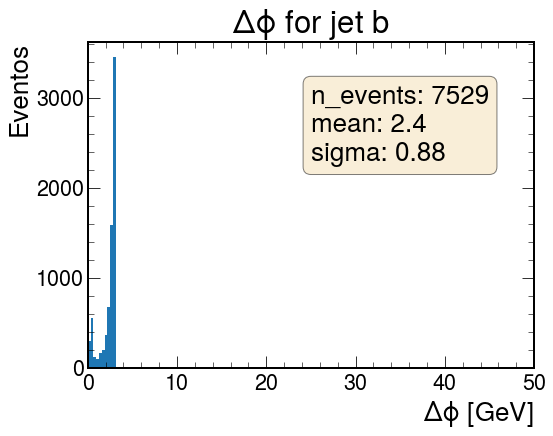

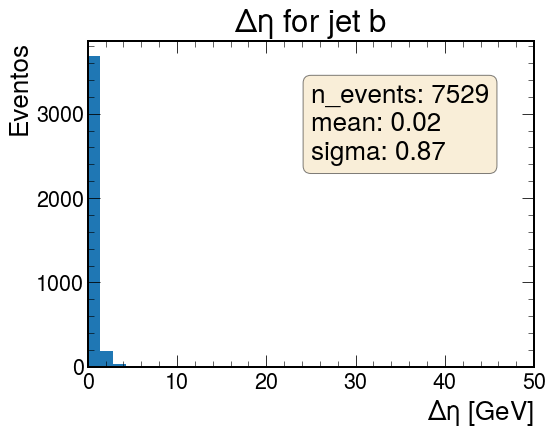

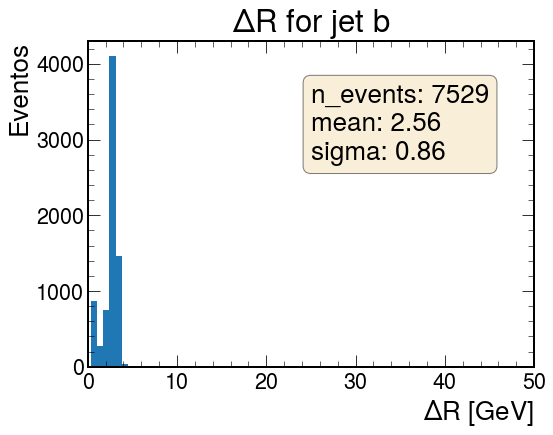

In [247]:
pt_jet(data_bjet,'Delta_phi_b',50,10)
pt_jet(data_bjet,'Delta_eta_b',50,10)
pt_jet(data_bjet,"DeltaR_b",50,10)

## Masa invariante en Colisionadores de particulas:

$\begin{equation}
M^{2} = 2P_{T1}P_{T2}[ cosh(\eta _{1} - \eta _{2}) - cos(\phi _{1} - \phi _{2}) ]
\end{equation}$

In [267]:
def inv_mass(pt1,pt2,Deta,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(Deta) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.Delta_eta_b,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b"] = inv_m # agregamos al dataset la masa invariante.

In [278]:
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,Delta_eta_b,Delta_phi_b,DeltaR_b,inv_mass_b
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,0.832740,1.306336,1.549184,49.844759
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,-0.630164,2.695330,2.768016,42.731848
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,0.444513,1.249388,1.326108,32.491735
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,0.992696,1.734860,1.998796,32.849040
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,-1.321776,3.137044,3.404136,46.292366


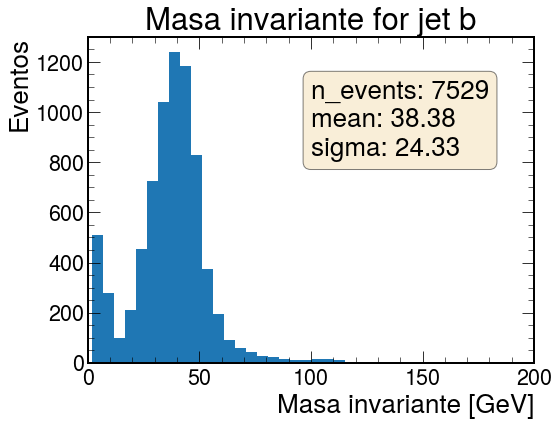

In [271]:
pt_jet(data_bjet,"inv_mass_b",200,100)